In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('bmh')

import warnings
warnings.filterwarnings("ignore")

In [2]:
wdata = pd.read_csv("~/Desktop/Work/ML_EIT/Data/walmart_allfiles.csv")
print(wdata.shape)
wdata.head()

(421570, 14)


,Unnamed: 0,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,index,Store,Dept,Date,IsHoliday.1,Weekly_Sales
0,0,42.31,2.572,211.096358,8.106,0,A,151315,0,1,1,2010-02-05,0,24924.50
1,1,38.51,2.548,211.242170,8.106,1,A,151315,1,1,1,2010-02-12,1,46039.49
2,2,39.93,2.514,211.289143,8.106,0,A,151315,2,1,1,2010-02-19,0,41595.55
3,3,46.63,2.561,211.319643,8.106,0,A,151315,3,1,1,2010-02-26,0,19403.54
4,4,46.50,2.625,211.350143,8.106,0,A,151315,4,1,1,2010-03-05,0,21827.90


In [3]:
wdata.tail()

,Unnamed: 0,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,index,Store,Dept,Date,IsHoliday.1,Weekly_Sales
421565,421565,64.88,3.997,192.013558,8.684,0,B,118221,421565,45,98,2012-09-28,0,508.37
421566,421566,64.89,3.985,192.170412,8.667,0,B,118221,421566,45,98,2012-10-05,0,628.10
421567,421567,54.47,4.000,192.327265,8.667,0,B,118221,421567,45,98,2012-10-12,0,1061.02
421568,421568,56.47,3.969,192.330854,8.667,0,B,118221,421568,45,98,2012-10-19,0,760.01
421569,421569,58.85,3.882,192.308899,8.667,0,B,118221,421569,45,98,2012-10-26,0,1076.80


In [4]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Temperature   421570 non-null  float64
 2   Fuel_Price    421570 non-null  float64
 3   CPI           421570 non-null  float64
 4   Unemployment  421570 non-null  float64
 5   IsHoliday     421570 non-null  int64  
 6   Type          421570 non-null  object 
 7   Size          421570 non-null  int64  
 8   index         421570 non-null  int64  
 9   Store         421570 non-null  int64  
 10  Dept          421570 non-null  int64  
 11  Date          421570 non-null  object 
 12  IsHoliday.1   421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
dtypes: float64(5), int64(7), object(2)
memory usage: 45.0+ MB


In [5]:
# Determine the Numeric and Categorical variable from the datasets
numeric_var = [key for key in dict(wdata.dtypes) if dict(wdata.dtypes)[key] 
               in ['float64','float32','int32','int64']]
cat_var = [key for key in dict(wdata.dtypes) if dict(wdata.dtypes)[key] 
           in ['object']]
print("Numerical variables: \n")
print(numeric_var)
print("categorical variables: \n")
print(cat_var)


Numerical variables: 

['Unnamed: 0', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Size', 'index', 'Store', 'Dept', 'IsHoliday.1', 'Weekly_Sales']
categorical variables: 

['Type', 'Date']


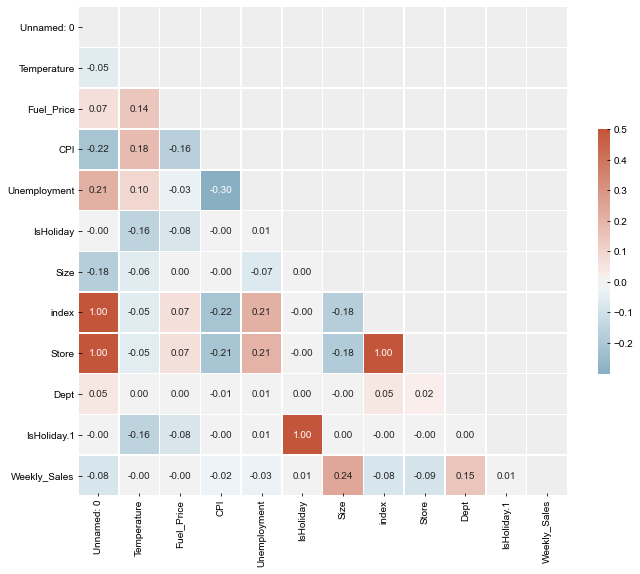

In [6]:
from string import ascii_letters
corr = wdata.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,fmt='.2f')
sns.set(font_scale=1.1)

In [7]:
# picking the date, dept and weekly sales from walmart data
wdatap = wdata[['Date','Dept','Weekly_Sales']]
wdatap.shape

(421570, 3)

In [8]:
# check the data missing or NULL
tot = wdata.isnull().sum(axis=0).sort_values(ascending=False)
per = ((wdata.isnull().sum(axis=0))/wdata.isnull().count(axis=0))*100
missing_columns = pd.concat([tot,per],axis=1,keys=['Total',"percentage"])
missing_columns

,Total,percentage
Weekly_Sales,0,0.0
IsHoliday.1,0,0.0
Date,0,0.0
Dept,0,0.0
Store,0,0.0
index,0,0.0
Size,0,0.0
Type,0,0.0
IsHoliday,0,0.0
Unemployment,0,0.0


In [9]:
##one way to pick the dept number using where statement
# indx = np.where(wdatap.Dept == 1)[0]
# print(len(indx))
# cdata = wdatap.iloc[indx,:]
# cdata.head()

(5619, 3)


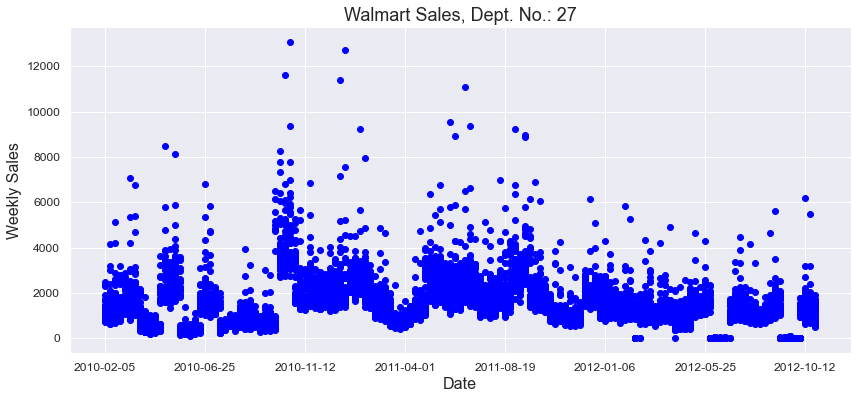

In [10]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
# Anotherway to pick the dept is 1
cdata=wdatap[wdatap['Dept'] == 27]
print(cdata.shape)

fig, ax = plt.subplots(figsize=(14,6))
ax.plot_date(sorted(cdata.Date),cdata.Weekly_Sales, color='blue')
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_xlabel("Date",fontsize=16)
ax.set_ylabel("Weekly Sales",fontsize=16)
ax.set_title("Walmart Sales, Dept. No.: 27",fontsize=18)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=17)
plt.show()

In [11]:
cdata.describe()

,Dept,Weekly_Sales
count,5619.0,5619.000000
mean,27.0,1583.437727
std,0.0,1167.135091
min,27.0,-7.500000
25%,27.0,844.000000
50%,27.0,1356.980000
75%,27.0,2058.105000
max,27.0,13078.920000


Text(0, 0.5, 'Density')

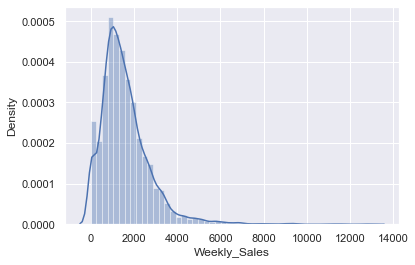

In [12]:
sns.set()
sns.distplot(cdata.Weekly_Sales)
plt.ylabel("Density")

In [13]:
df = cdata
def box_dist_plot(Feature):
    f, (ax_box, ax_dist) = plt.subplots(2, figsize=(10,6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(Feature, data=df, color='blue', ax=ax_box)
    sns.distplot(df[Feature],hist=True, kde=False, color='blue', ax=ax_dist)
    ax_dist.set_ylabel('Counts')
    ax_box.set_xlabel('')
    Q1 = df[Feature].quantile(0.25)
    Q3 = df[Feature].quantile(0.75)
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    print('Lower Whisker:',Lower_Whisker, 'Upper Whisker:',Upper_Whisker)

In [14]:
# OUtliear Remover Function
def OutlierRemover(Feature):
    global df
    Q1 = df[Feature].quantile(0.25)
    Q3 = df[Feature].quantile(0.75)
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    df = df[(df[Feature]>Lower_Whisker)&(df[Feature]<Upper_Whisker)]

Lower Whisker: -977.1575 Upper Whisker: 3879.2625


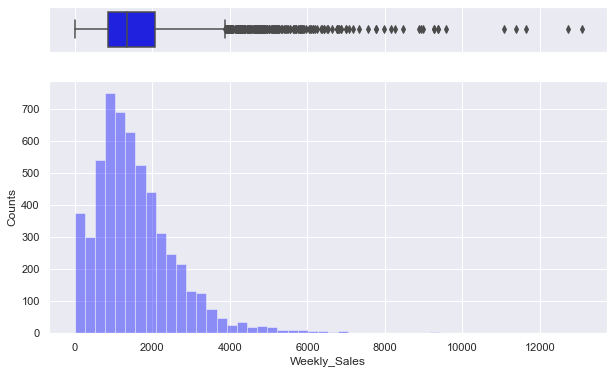

In [15]:
box_dist_plot('Weekly_Sales')

In [16]:
# Converting Date field to Datetime so that we can easily extract week no, day, date and year from 
# date and make them as new columns
cdata['Date'] = pd.to_datetime(cdata['Date'])
# Extract date features
cdata['Dayofweek'] =cdata['Date'].dt.dayofweek
cdata['Month'] =cdata['Date'].dt.month 
cdata['Year'] =cdata['Date'].dt.year
cdata['Day'] =cdata['Date'].dt.day
cdata.head()

,Date,Dept,Weekly_Sales,Dayofweek,Month,Year,Day
3545,2010-02-05,27,2293.00,4,2,2010,5
3546,2010-02-12,27,2339.50,4,2,2010,12
3547,2010-02-19,27,2494.50,4,2,2010,19
3548,2010-02-26,27,1666.75,4,2,2010,26
3549,2010-03-05,27,1467.50,4,3,2010,5


In [17]:
print(cdata.shape)
# Set dates as index for any other dataset, so that it can be treated as
# time-series dataframe
cdata.set_index('Date', inplace=True)

(5619, 7)


In [18]:
weeksales = cdata.groupby('Date')['Weekly_Sales'].sum()
weeksales.head()
print(len(cdata.Weekly_Sales))
print(len(weeksales))

5619
143


In [19]:
weeksales.head()

Date
2010-02-05    84463.38
2010-02-12    78835.77
2010-02-19    77712.37
2010-02-26    66844.09
2010-03-05    67129.48
Name: Weekly_Sales, dtype: float64

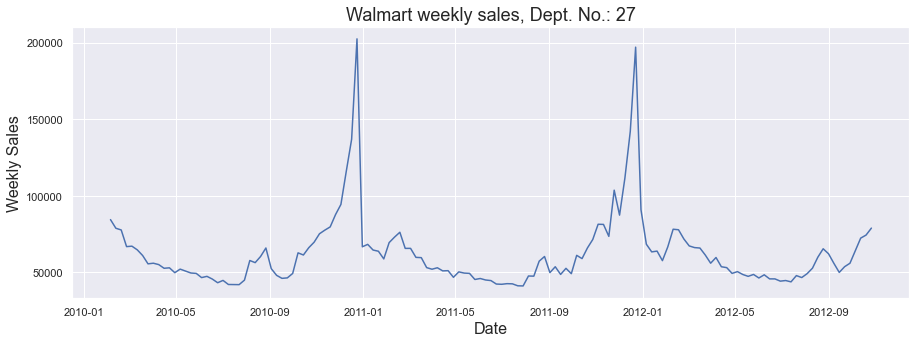

In [20]:
plt.figure(figsize=(15,5))
plt.plot(weeksales)
plt.xlabel("Date",fontsize=16)
plt.ylabel("Weekly Sales",fontsize=16)
plt.title("Walmart weekly sales, Dept. No.: 27",fontsize=18)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=17)

In [21]:
print(weeksales)

Date
2010-02-05    84463.38
2010-02-12    78835.77
2010-02-19    77712.37
2010-02-26    66844.09
2010-03-05    67129.48
                ...   
2012-09-28    55998.21
2012-10-05    64211.22
2012-10-12    72390.11
2012-10-19    74369.67
2012-10-26    78921.57
Name: Weekly_Sales, Length: 143, dtype: float64


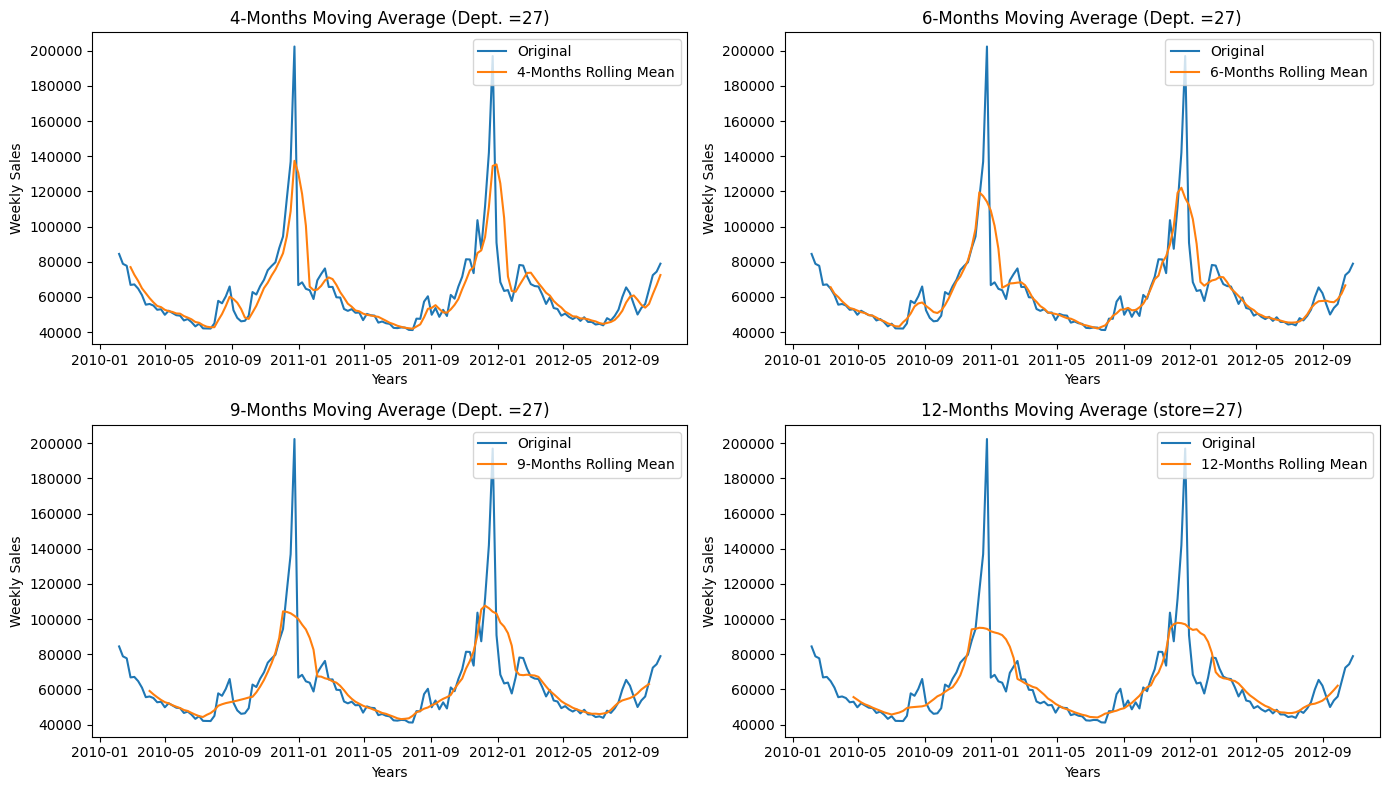

In [22]:
# resetting the axes fonts and sizes
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Rolling average plots
fig, axes = plt.subplots(2,2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(weeksales.index,weeksales,label='Original')
axes[0][0].plot(weeksales.index,weeksales.rolling(window=4).mean(),
               label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("4-Months Moving Average (Dept. =27)")
axes[0][0].legend(loc='best')

axes[0][1].plot(weeksales.index,weeksales,label='Original')
axes[0][1].plot(weeksales.index,weeksales.shift(-2).rolling(window=6).mean(),
               label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("6-Months Moving Average (Dept. =27)")
axes[0][1].legend(loc='best')

axes[1][0].plot(weeksales.index,weeksales,label='Original')
axes[1][0].plot(weeksales.index,weeksales.shift(-3).rolling(window=9).mean(),
               label='9-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("9-Months Moving Average (Dept. =27)")
axes[1][0].legend(loc='best')

axes[1][1].plot(weeksales.index,weeksales,label='Original')
axes[1][1].plot(weeksales.index,weeksales.shift(-4).rolling(window=12).mean(),
               label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average (store=27)")
axes[1][1].legend(loc='best')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.tight_layout()
plt.show()

## seasonality - Time series Decomposition

In [23]:
cdata.head()

,Dept,Weekly_Sales,Dayofweek,Month,Year,Day
Date,,,,,,
2010-02-05,27,2293.00,4,2,2010,5
2010-02-12,27,2339.50,4,2,2010,12
2010-02-19,27,2494.50,4,2,2010,19
2010-02-26,27,1666.75,4,2,2010,26
2010-03-05,27,1467.50,4,3,2010,5


In [24]:
# Before estimate the seasonality, first we will see how weekly vary on a 
# month wise
monthly_sales = pd.pivot_table(cdata, values="Weekly_Sales", columns="Year",
                              index="Month")
monthly_sales = monthly_sales.reindex(index=[1,2,3,4,5,6,7,8,9,10,11,12])
monthly_sales

Year,2010,2011,2012
Month,,,
1,NaN,1715.203490,1564.307593
2,2080.105473,1921.489595,1807.120920
3,1679.005743,1498.830126,1568.164505
4,1441.555081,1215.825263,1358.191132
5,1364.900811,1159.050595,1228.245786
6,1228.293154,1073.503976,1147.812289
7,1167.646541,994.998531,1123.564724
8,1624.876892,1298.493476,1425.959655
9,1304.922027,1258.054554,1331.237222


In [25]:
monsales = monthly_sales
monsales = monsales.to_numpy()
print(monsales[:,2])

[1564.30759259 1807.12092025 1568.16450495 1358.19113208 1228.24578616
 1147.81228856 1123.56472393 1425.95965517 1331.23722222 1767.63762195
           nan           nan]


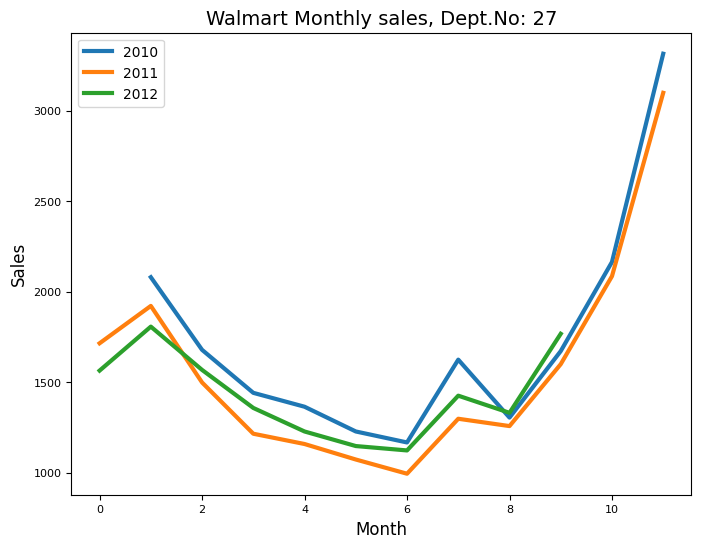

In [26]:
plt.figure(figsize=(8,6))
# plt.plot(monthly_sales,lw=3)
plt.plot(monsales[:,0],lw=3,label='2010')
plt.plot(monsales[:,1],lw=3,label='2011')
plt.plot(monsales[:,2],lw=3,label='2012')
plt.xlabel("Month",fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.title("Walmart Monthly sales, Dept.No: 27",fontsize=14)
plt.legend()
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19    74464.076667
2010-02-26    70561.980000
2010-03-05    66233.730000
                  ...     
2012-09-28    57982.243333
2012-10-05    64199.846667
2012-10-12    70323.666667
2012-10-19    75227.116667
2012-10-26             NaN
Name: Weekly_Sales, Length: 143, dtype: float64


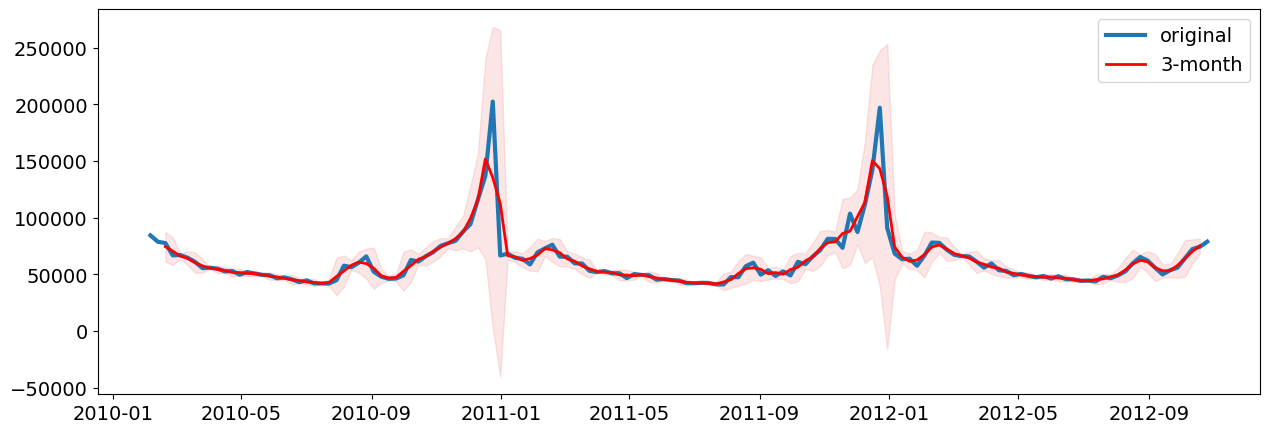

In [27]:
rolling_mean = weeksales.shift(-1).rolling(window=3).mean() 
rolling_std = weeksales.shift(-1).rolling(window=3).std() 
lower_bound = rolling_mean - (1.96*rolling_std)
upper_bound = rolling_mean + (1.96*rolling_std)

plt.figure(figsize=(15,5))
plt.plot(weeksales.index,weeksales,label='original',lw=3)
plt.plot(weeksales.index,rolling_mean,'g',color='red',lw=2,label='3-month')
plt.fill_between(x=weeksales.index, y1=lower_bound, y2=upper_bound,
                    color='lightcoral', alpha=0.2)
plt.legend(loc='best',fontsize=14)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
print(rolling_mean)

## Time series decomposition

In [28]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(weeksales, extrapolate_trend=9)

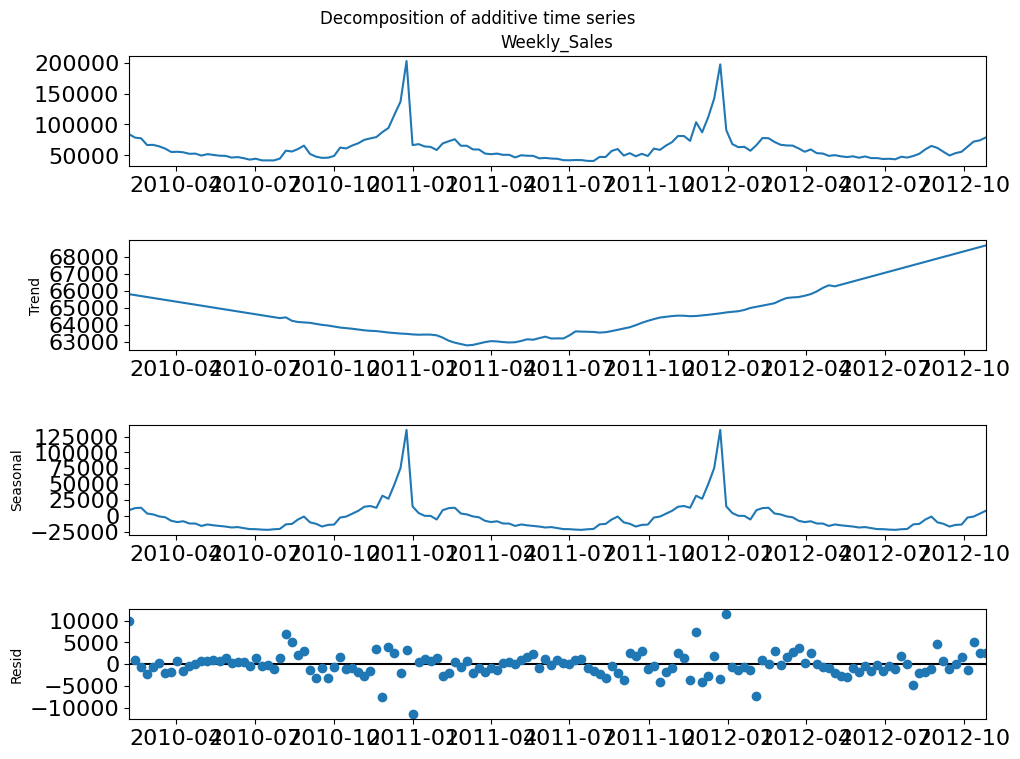

In [29]:
# fig,axs = plt.subplots(2,2)
# fig.set_figwidth(14)
# fig.set_figheight(8)

# axs[0][0].plot(decomposition.observed)
# axs[0][0].set_ylabel("Observed",fontsize=14)
# axs[0][0].set_title("Decomposition Analysis",fontsize=15)

# axs[0][1].plot(decomposition.seasonal)
# axs[0][1].set_ylabel("Seasonal",fontsize=14)

# axs[1][0].plot(decomposition.trend)
# axs[1][0].set_ylabel("trend",fontsize=14)

# axs[1][1].plot(decomposition.resid)
# axs[1][1].set_ylabel("Residual",fontsize=14)

# plt.rc('xtick', labelsize=5)
# plt.rc('ytick', labelsize=6)
# plt.tight_layout()
# plt.show()

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
# plt.tight_layout()
plt.show()

In [30]:
dcomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend,
                               decomposition.seasonal,decomposition.resid],axis=1))
dcomp_output.columns=['Observed','Trend','Seasonal','Residual']
dcomp_output

,Observed,Trend,Seasonal,Residual
Date,,,,
2010-02-05,84463.38,65824.601172,8834.388458,9804.390369
2010-02-12,78835.77,65768.190438,12039.544761,1028.034801
2010-02-19,77712.37,65711.779703,12649.542634,-648.952337
2010-02-26,66844.09,65655.368968,3537.973712,-2349.252680
2010-03-05,67129.48,65598.958233,2108.972323,-578.450556
...,...,...,...,...
2012-09-28,55998.21,68304.916679,-13966.057352,1659.350672
2012-10-05,64211.22,68401.126659,-2805.523948,-1384.382712
2012-10-12,72390.11,68497.336639,-1303.365896,5196.139257


In [31]:
##Log(Time series) decomposition

In [32]:
weeksales_log =  np.log10(weeksales)
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(weeksales_log,  model ="additive" ,freq=48, extrapolate_trend=4)

decomposition1 = sm.tsa.seasonal_decompose(weeksales_log, extrapolate_trend=9)

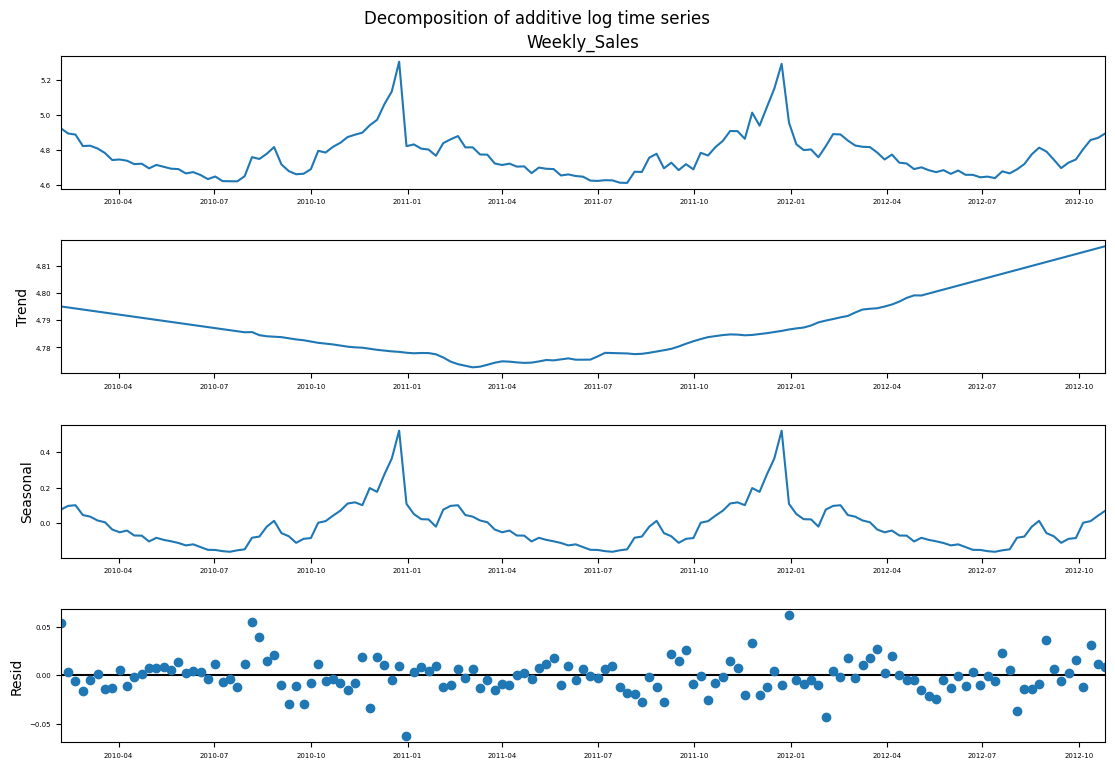

In [33]:
fig = decomposition1.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive log time series')
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
# plt.tight_layout()
plt.show()

## Dickey-Fuller test

In [34]:
from statsmodels.tsa.stattools import adfuller
print("Dickey-Fuller test results:")
dftest = adfuller(weeksales)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller test results:
Test Statistic                  -4.787691
p-value                          0.000057
#lags Used                       0.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


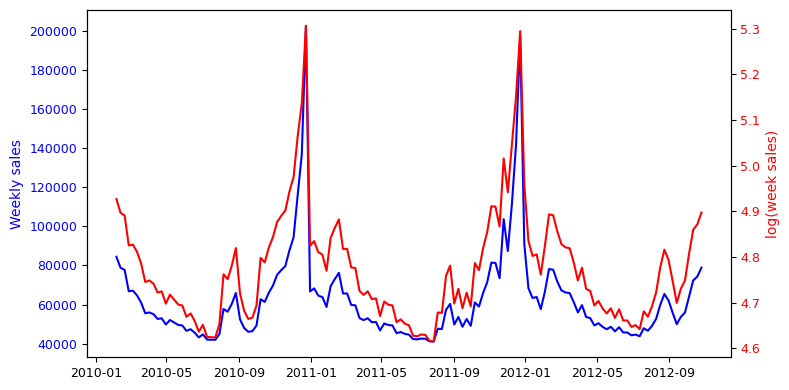

In [35]:
weeksales_log = np.log10(weeksales)

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(weeksales,color='blue')
ax1.set_ylabel("Weekly sales",color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx() #create a second axis that shares same x-axis

ax2.plot(weeksales_log,color='red')
ax2.set_ylabel("log(week sales)",color='red')
ax2.tick_params(axis='y',labelcolor='red')
fig.tight_layout()
plt.show()

In [36]:
# Dickey-Fuller test to log_weeksales
print("Dickey-Fuller test results:")
dftest = adfuller(weeksales_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller test results:
Test Statistic                  -3.406634
p-value                          0.010735
#lags Used                       0.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


In [37]:
weeksales.diff(1).head()
weeksales_diff1 = weeksales.diff(1)
weeksales_diff1.dropna(inplace=True)

weeksales_log_diff1 = weeksales_log.diff(1)
weeksales_log_diff1.dropna(inplace=True)

In [38]:
# Dickey-Fuller test to log_weeksales
print("Dickey-Fuller test results:")
dftest = adfuller(weeksales_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Dickey-Fuller test results:


Test Statistic                -6.883407e+00
p-value                        1.414447e-09
#lags Used                     4.000000e+00
Number of Observations Used    1.370000e+02
Critical Value (1%)           -3.479007e+00
Critical Value (5%)           -2.882878e+00
Critical Value (10%)          -2.578149e+00
dtype: float64

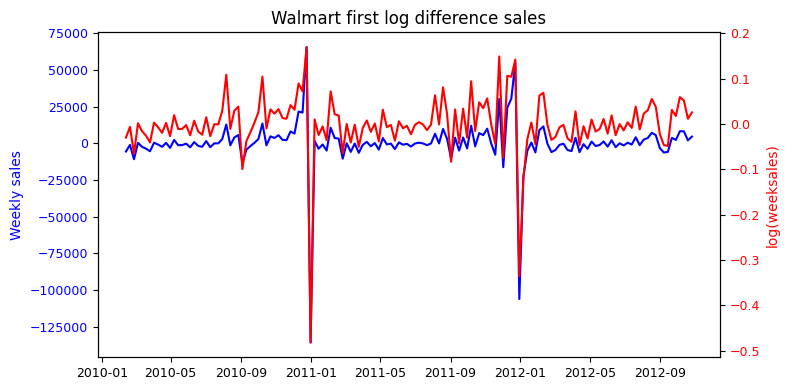

In [39]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(weeksales_diff1,color='blue')
ax1.set_ylabel("Weekly sales",color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx() #create a second axis that shares same x-axis

ax2.plot(weeksales_log_diff1,color='red')
ax2.set_ylabel("log(weeksales)",color='red')
ax2.tick_params(axis='y',labelcolor='red')
ax2.set_title("Walmart first log difference sales")
fig.tight_layout()
plt.show()

In [40]:
weeksales_diff2 = weeksales.diff(2)
weeksales_diff2.dropna(inplace=True)

weeksales_log_diff2 = weeksales_log.diff(2)
weeksales_log_diff2.dropna(inplace=True)

#  Dickey-Fuller test to log_weeksales
print("Dickey-Fuller test results:")
dftest = adfuller(weeksales_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller test results:
Test Statistic                -7.347555e+00
p-value                        1.026090e-10
#lags Used                     3.000000e+00
Number of Observations Used    1.370000e+02
Critical Value (1%)           -3.479007e+00
Critical Value (5%)           -2.882878e+00
Critical Value (10%)          -2.578149e+00
dtype: float64


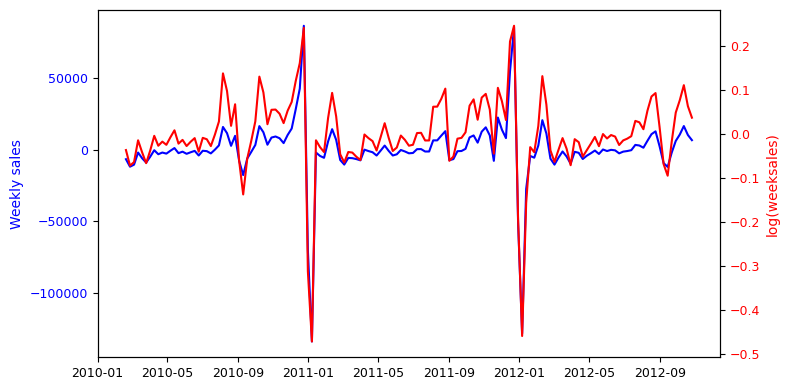

In [41]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(weeksales_diff2,color='blue')
ax1.set_ylabel("Weekly sales",color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx() #create a second axis that shares same x-axis

ax2.plot(weeksales_log_diff2,color='red')
ax2.set_ylabel("log(weeksales)",color='red')
ax2.tick_params(axis='y',labelcolor='red')
fig.tight_layout()
plt.show()

## ARIMA model

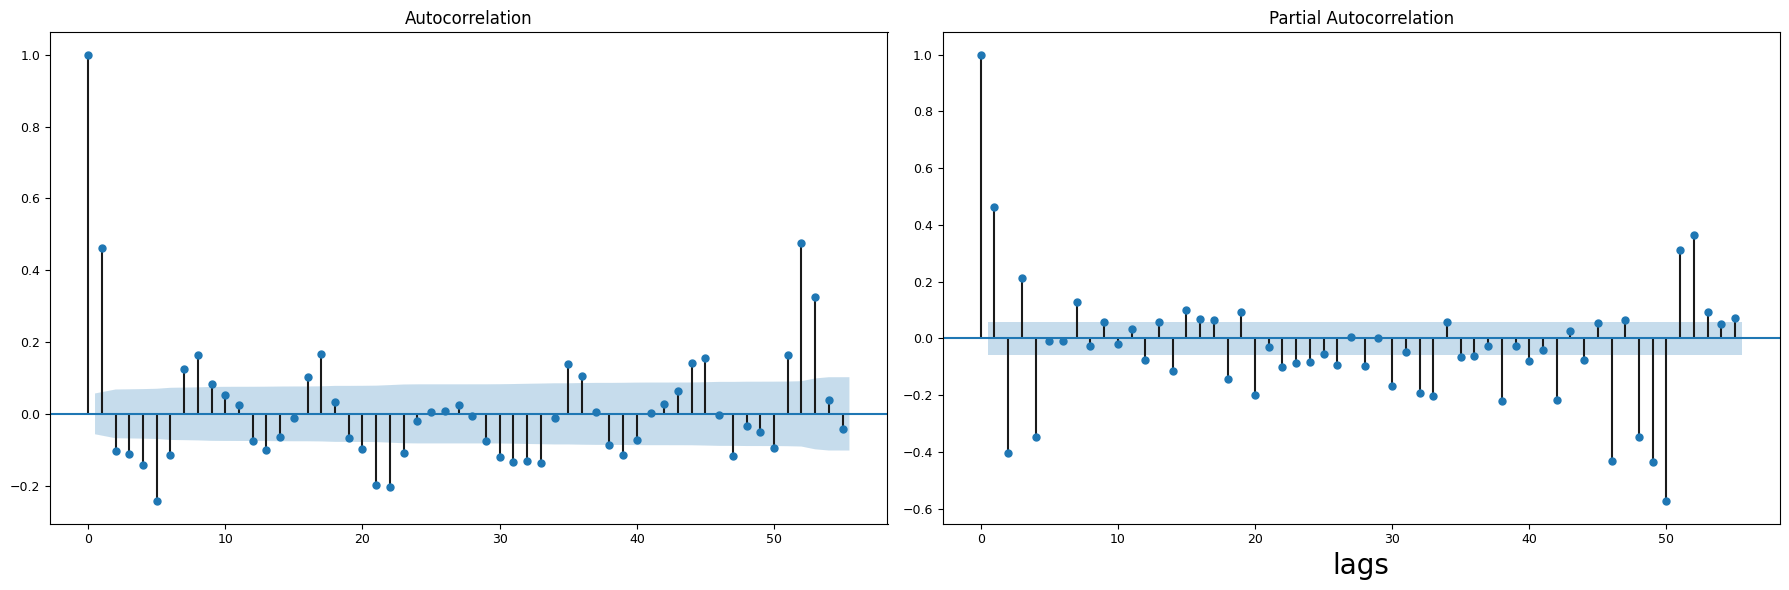

In [42]:
# Difference data to make data stationary (because mean removed)
# The next thing to do make series stationary by removing the upward trend 
# through 1st order differencing.
# differencing (d=1): Y'(t) = Y(t)-Y(t-1)
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(6)
smt.graphics.plot_acf(weeksales_log_diff2, lags=55, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(weeksales_log_diff2, lags=55, ax=axes[1], alpha=0.5,method='ols')
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xlabel("lags",color='black',fontsize=20)
plt.tight_layout()

In [43]:
model = sm.tsa.statespace.SARIMAX(weeksales_log_diff2, order = (1,0,1), seasonal_order= (1,0,0,12),
                                  enforce_stationarity=False,enforce_invertibility=False)

In [44]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  141
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                 159.022
Date:                             Mon, 28 Sep 2020   AIC                           -310.044
Time:                                     15:55:59   BIC                           -298.636
Sample:                                 02-19-2010   HQIC                          -305.409
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0674      0.079     -0.850      0.395      -0.223       0.088
ma.L1          1.0000    122.038      0.008      0.993    -238.191     240.191
ar.S.L12      -0.1356      0.091     -1.483      0.138      -0.315       0.044
sigma2         0.0047      0.573      0.008      0.993      -1.119       1.129
===================================================================================
Ljung-Box (Q):                       35.57   Jarque-Bera (JB):              1450.49
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -2.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

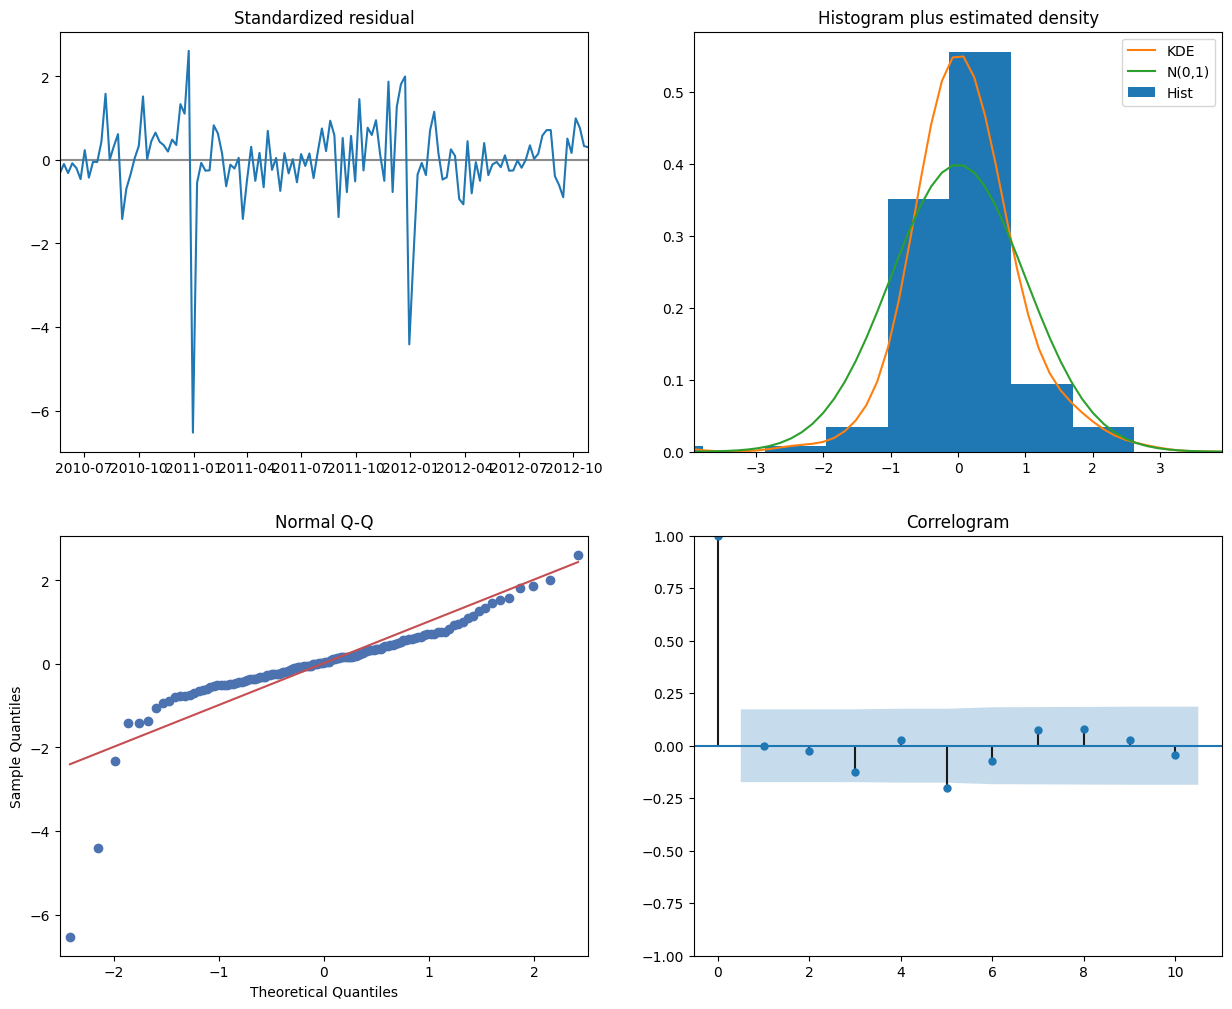

In [45]:
mpl.rcParams.update(mpl.rcParamsDefault)
results.plot_diagnostics(figsize=(15,12))
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.show()

## Timeseries Forecasting using FBProphet

In [46]:
from fbprophet import Prophet 

In [47]:
trdata=cdata.groupby('Date')[['Weekly_Sales']].sum()
trdata.shape

(143, 1)

In [48]:
trdata.head()

,Weekly_Sales
Date,
2010-02-05,84463.38
2010-02-12,78835.77
2010-02-19,77712.37
2010-02-26,66844.09
2010-03-05,67129.48


In [49]:
trdata['ds'] = trdata.index
trdata.head()

,Weekly_Sales,ds
Date,,
2010-02-05,84463.38,2010-02-05
2010-02-12,78835.77,2010-02-12
2010-02-19,77712.37,2010-02-19
2010-02-26,66844.09,2010-02-26
2010-03-05,67129.48,2010-03-05


In [50]:
trdata = trdata[['ds', 'Weekly_Sales']].rename(columns={'ds': 'ds', 'Weekly_Sales': 'y'})

In [51]:
sales27_model = Prophet(seasonality_mode='additive',interval_width=0.95)
sales27_model.fit(trdata)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
sales27_forecast = sales27_model.make_future_dataframe(periods=18, freq='MS')
sales27_forecast = sales27_model.predict(sales27_forecast)

In [53]:
sales27_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,65694.216461,60541.664519,96162.405826,65694.216461,65694.216461,13191.155247,13191.155247,13191.155247,13191.155247,13191.155247,13191.155247,0.0,0.0,0.0,78885.371708
1,2010-02-12,65644.499983,58529.938034,94038.456906,65644.499983,65644.499983,11360.232072,11360.232072,11360.232072,11360.232072,11360.232072,11360.232072,0.0,0.0,0.0,77004.732054
2,2010-02-19,65594.783504,54277.370943,91121.605050,65594.783504,65594.783504,6503.389265,6503.389265,6503.389265,6503.389265,6503.389265,6503.389265,0.0,0.0,0.0,72098.172769
3,2010-02-26,65545.067026,52390.288366,88902.999577,65545.067026,65545.067026,4093.847935,4093.847935,4093.847935,4093.847935,4093.847935,4093.847935,0.0,0.0,0.0,69638.914961
4,2010-03-05,65495.350547,52898.983909,86415.093561,65495.350547,65495.350547,3081.914340,3081.914340,3081.914340,3081.914340,3081.914340,3081.914340,0.0,0.0,0.0,68577.264887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2013-12-01,70678.366121,80885.326511,116904.215532,69483.084795,71960.408048,28192.024720,28192.024720,28192.024720,28192.024720,28192.024720,28192.024720,0.0,0.0,0.0,98870.390842
157,2014-01-01,70925.351031,95682.593641,128714.777704,69569.760847,72343.804100,40735.298587,40735.298587,40735.298587,40735.298587,40735.298587,40735.298587,0.0,0.0,0.0,111660.649618
158,2014-02-01,71172.335940,63946.248250,98990.038946,69646.657839,72739.985147,10083.568536,10083.568536,10083.568536,10083.568536,10083.568536,10083.568536,0.0,0.0,0.0,81255.904476
159,2014-03-01,71395.419084,57879.583578,92992.599068,69720.181979,73070.704984,3722.182806,3722.182806,3722.182806,3722.182806,3722.182806,3722.182806,0.0,0.0,0.0,75117.601890


<Figure size 1800x600 with 0 Axes>

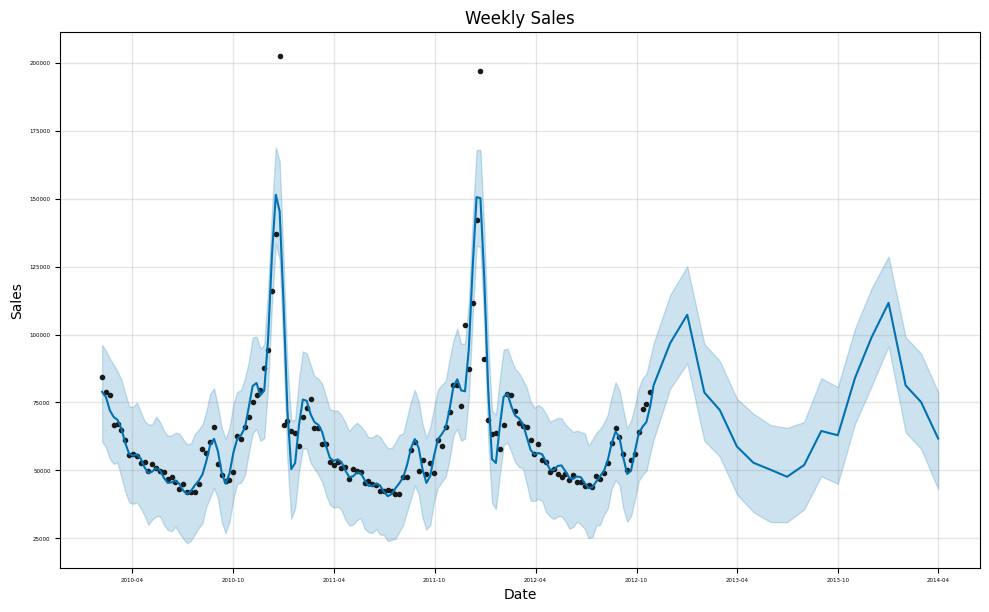

In [54]:
plt.figure(figsize=(18, 6))
sales27_model.plot(sales27_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Weekly Sales');

## Trends and pattern using timeseries data

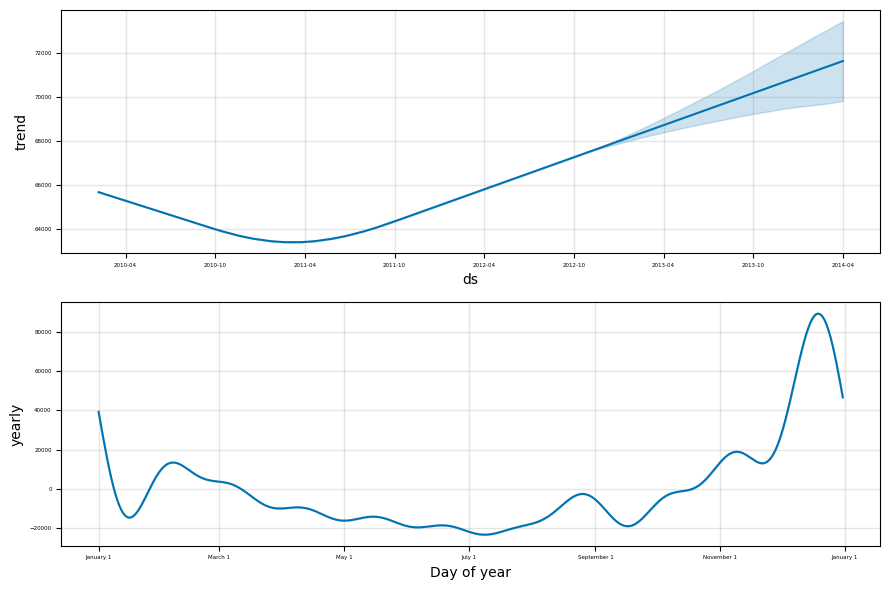

In [55]:
##We can use the Prophet Models to inspect different trends of these
# two categories in the data
sales27_model.plot_components(sales27_forecast);